# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Sendy has hired you to help predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination. Build a model that predicts an accurate delivery time, from picking up a package arriving at the final destination. An accurate arrival time prediction will help all business to improve their logistics and communicate the accurate time their time to their customers. You will be required to perform various feature engineering techniques while preparing your data for further analysis.


### b) Defining the Metric for Success

The Root Mean Squared Error (RMSE) and the R-squared (R2) scores will be the metrics by which we evaluate the success of our model.

### c) Understanding the Context 

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

Since the dataset provided is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi, it is relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [120]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [121]:
# loading and previewing dataset
#df = pd.read_csv('sendy_logistics.csv')
df = pd.read_csv('https://bit.ly/3deaKEM ')

df.sample(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
18263,Order_No_1485,User_Id_706,Bike,3,Business,18,2,3:30:54 PM,18,2,3:39:13 PM,18,2,4:36:46 PM,18,2,4:38:04 PM,18,2,4:40:36 PM,6,23.5,NaN,-1.307787,36.844321,-1.322800,36.830644,Rider_Id_728,152
18167,Order_No_441,User_Id_496,Bike,3,Business,3,3,3:01:18 PM,3,3,3:01:50 PM,3,3,3:03:43 PM,3,3,3:10:13 PM,3,3,3:57:00 PM,23,28.4,NaN,-1.255189,36.782203,-1.374163,36.913444,Rider_Id_709,2807
6764,Order_No_24572,User_Id_2174,Bike,3,Business,21,5,10:14:11 AM,21,5,10:14:36 AM,21,5,10:14:49 AM,21,5,11:13:18 AM,21,5,12:23:42 PM,28,22.9,NaN,-1.248278,36.884092,-1.391222,36.760676,Rider_Id_946,4224


In [122]:
# checking dataset shape
df.shape

(21201, 29)

In [123]:
# checking data types
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [124]:
# convert the time variables to their proper data type
from datetime import datetime

time_variables =['Arrival at Pickup - Time', 'Placement - Time', 'Confirmation - Time',
                 'Pickup - Time', 'Arrival at Destination - Time']

for var in time_variables:
    df[var] = df[var].apply(lambda x: datetime.strptime(x, '%I:%M:%S %p')).dt.time
     
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,11:23:21,12,5,11:40:22,12,5,11:44:09,12,5,12:17:22,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,12:42:44,30,2,12:49:34,30,2,12:53:03,30,2,13:00:38,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,09:26:05,15,5,09:37:56,15,5,09:43:06,15,5,10:05:27,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,09:56:18,13,1,10:03:53,13,1,10:05:23,13,1,10:25:37,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [125]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(21201, 29)

In [126]:
# checking for missing data
df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [127]:
# get percentage of missing values
temp_missing = (df['Temperature'].isna().sum() / df.shape[0]) * 100
precip_missing = (df['Precipitation in millimeters'].isna().sum() / df.shape[0]) * 100

print(round(temp_missing, 2))
print(round(precip_missing, 2))

20.59
97.4


We will drop the Precipitation variable and then impute the Temperature variable with its mean.

In [128]:
# dropping the column with too many missing values
df = df.drop(columns = ['Precipitation in millimeters'])

# imputing the column with a reasonable amount of missing values
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

# confirming we have taken care of all missing values
df.isna().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

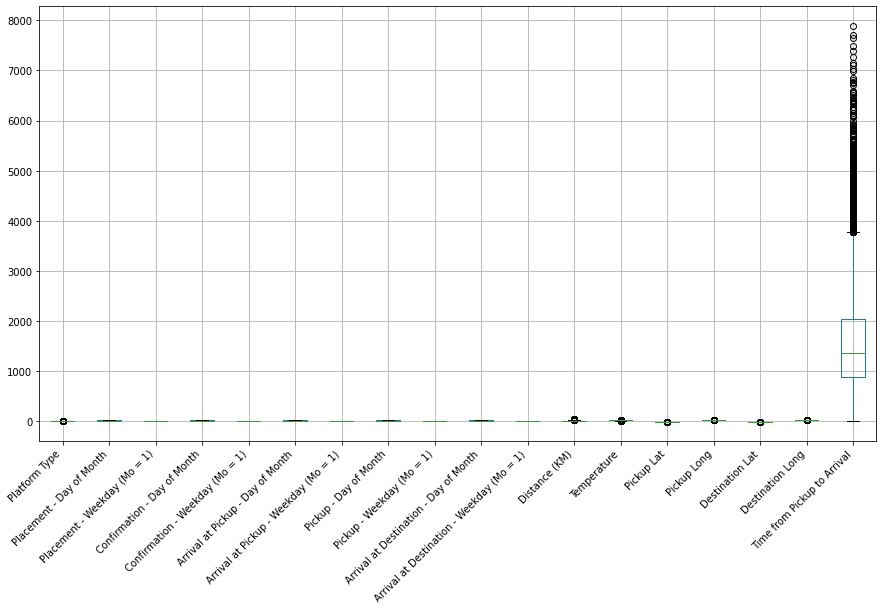

In [129]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot(rot = 45)
plt.xticks(ha = 'right')
plt.show()

In [130]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(6471, 28)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
16049,Order_No_30,User_Id_419,Bike,3,Business,7,2,14:24:11,7,2,14:24:33,7,2,14:31:29,7,2,14:37:30,7,2,15:41:22,23,23.258889,-1.370038,36.919017,-1.257147,36.795063,Rider_Id_238,3832
7793,Order_No_17147,User_Id_2556,Bike,1,Personal,6,5,15:20:45,6,5,15:20:58,6,5,15:26:38,6,5,15:34:39,6,5,16:05:10,16,22.300000,-1.293354,36.795878,-1.215177,36.884652,Rider_Id_103,1831
11401,Order_No_11346,User_Id_2982,Bike,3,Business,26,2,15:45:17,26,2,15:46:24,26,2,15:51:53,26,2,16:34:51,26,2,17:26:17,18,29.400000,-1.300921,36.828195,-1.177202,36.835118,Rider_Id_697,3086


In [131]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

30.52

In [132]:
# removing the records with the outliers
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
df.shape

(14730, 28)

In [133]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: Order No
Number of unique variables: 14730
['Order_No_4211' 'Order_No_1899' 'Order_No_9336' ... 'Order_No_8834'
 'Order_No_22892' 'Order_No_9836']

Variable: User Id
Number of unique variables: 1229
['User_Id_633' 'User_Id_265' 'User_Id_1402' ... 'User_Id_3036'
 'User_Id_1922' 'User_Id_2001']

Variable: Vehicle Type
Number of unique variables: 1
['Bike']

Variable: Platform Type
Number of unique variables: 1
[3]

Variable: Personal or Business
Number of unique variables: 2
['Business' 'Personal']

Variable: Placement - Day of Month
Number of unique variables: 31
[ 9 30 15 14 11 23  2 19 12  3 28 17 22 13  8 24 26 18  7 21 27  5  1  4
 16  6 25 29 10 20 31]

Variable: Placement - Weekday (Mo = 1)
Number of unique variables: 7
[5 2 1 3 4 6 7]

Variable: Placement - Time
Number of unique variables: 11846
[datetime.time(9, 35, 46) datetime.time(12, 39, 25)
 datetime.time(9, 25, 34) ... datetime.time(17, 13, 44)
 datetime.time(12, 41, 17) datetime.time(13, 8, 34)]

Variable: Confi

Variables 'Vehicle Type' and 'Platform Type' have only 1 unique value each. We'll drop both columns.

In [134]:
df.drop(columns = ['Vehicle Type', 'Platform Type'], inplace = True)

# <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [135]:
# selecting the columns that are numerical variables
num_var = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


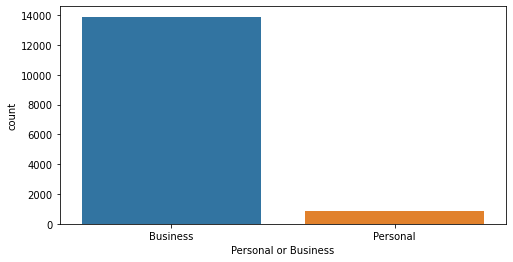

In [136]:
# plotting the distribution of personal or Business
plt.figure(figsize = (8, 4))
bar_plot = sns.countplot(df['Personal or Business'])
plt.show()

Majority of the clients type is Businesses rather than Personal. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


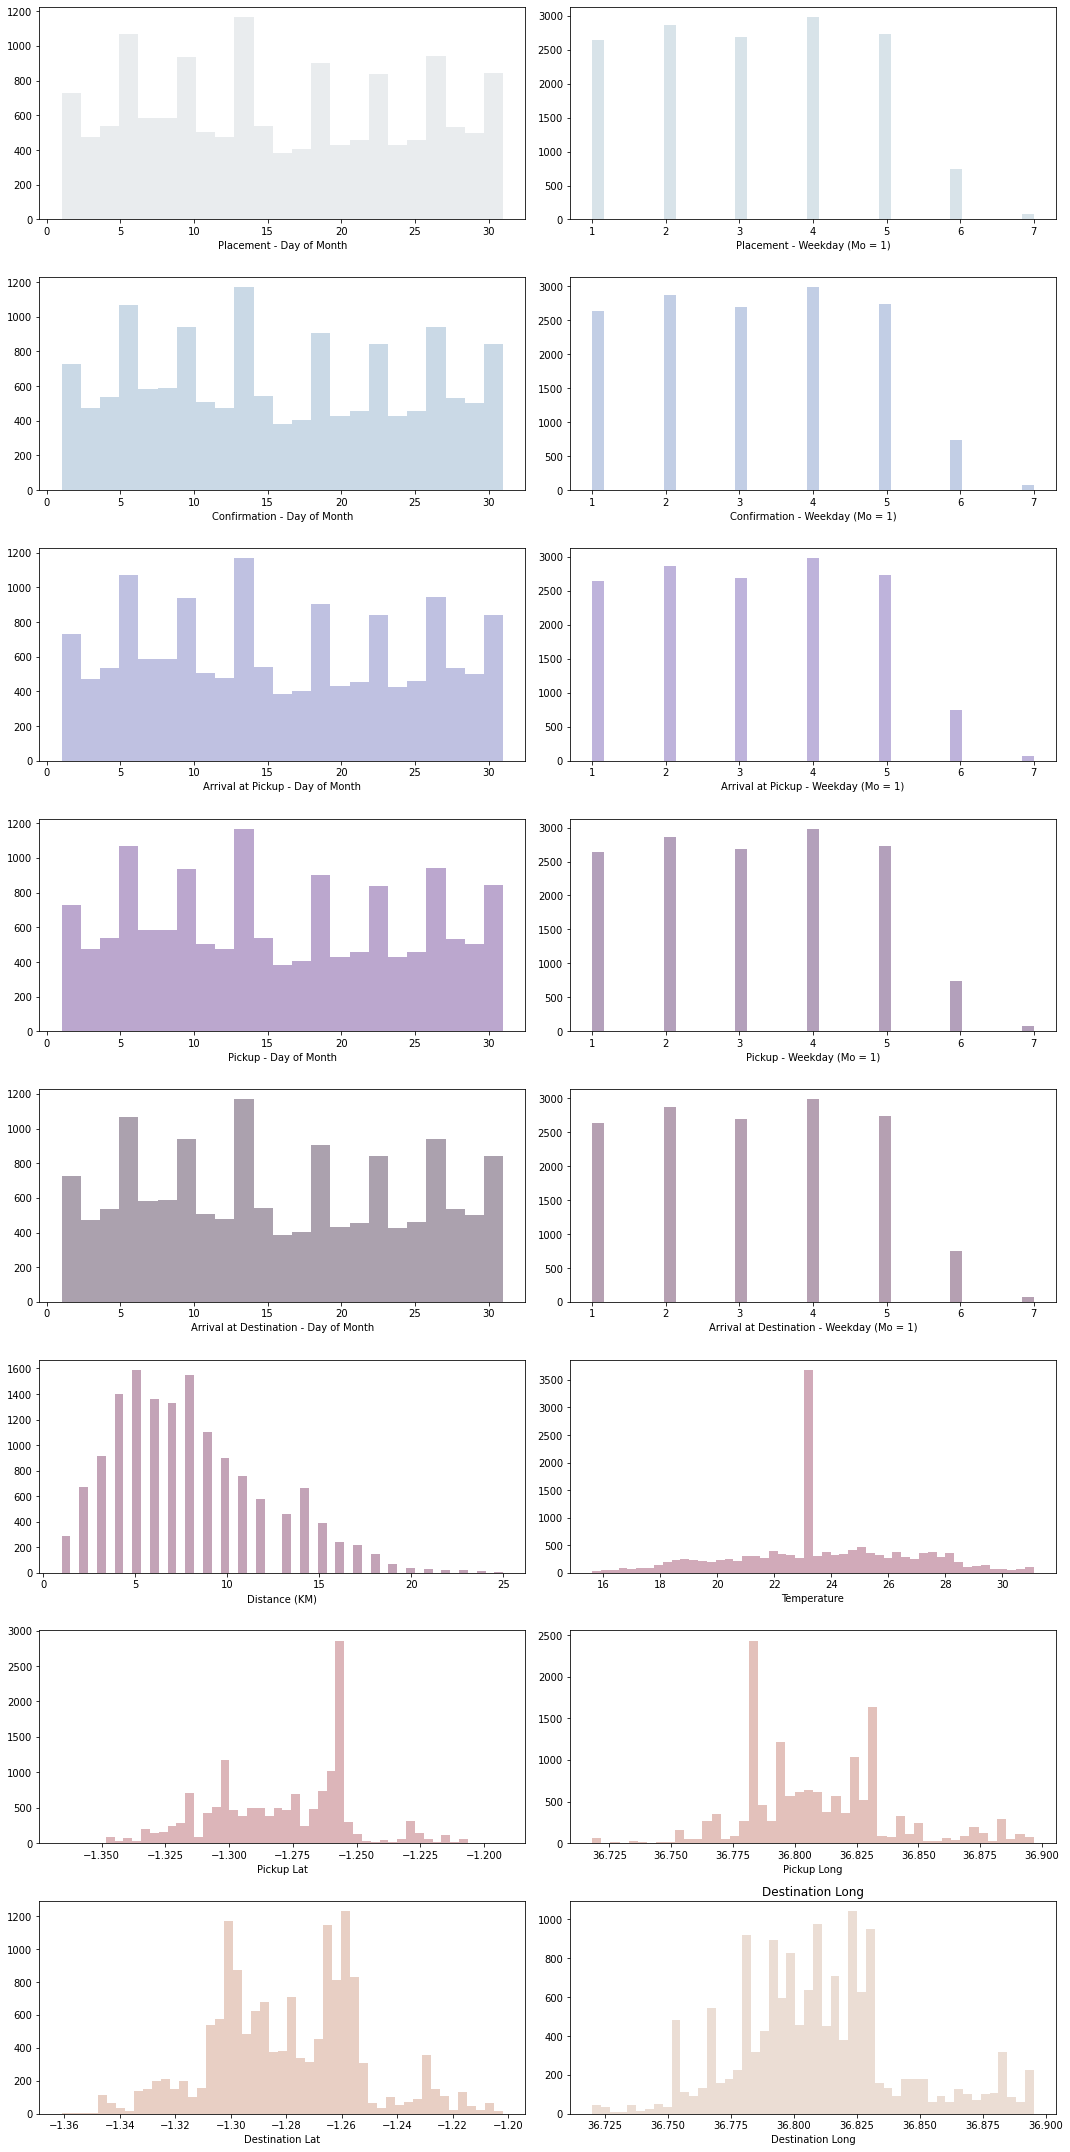

In [137]:
# plotting the histograms of the categorical variables
num_length = round(len(num_var) / 2)
colors = sns.color_palette("twilight", len(num_var))

fig, axes = plt.subplots(nrows = num_length, ncols = 2, figsize = (15, 30))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.distplot(df[var], ax = ax, color = color, kde = False, kde_kws = {'alpha' : 0.6})
    plt.title(var)
    
plt.tight_layout()

We note that services happen less often over the weekends than on the weekdays.

Majority of the deliveries cover distances ranging from 0 to 15 km.

There seems to be high activity on the days that are multiples of 5, e.g., 5th, 10th, 25th, etc. compared to the other days of the month. 

### 3.2 Bivariate Analysis

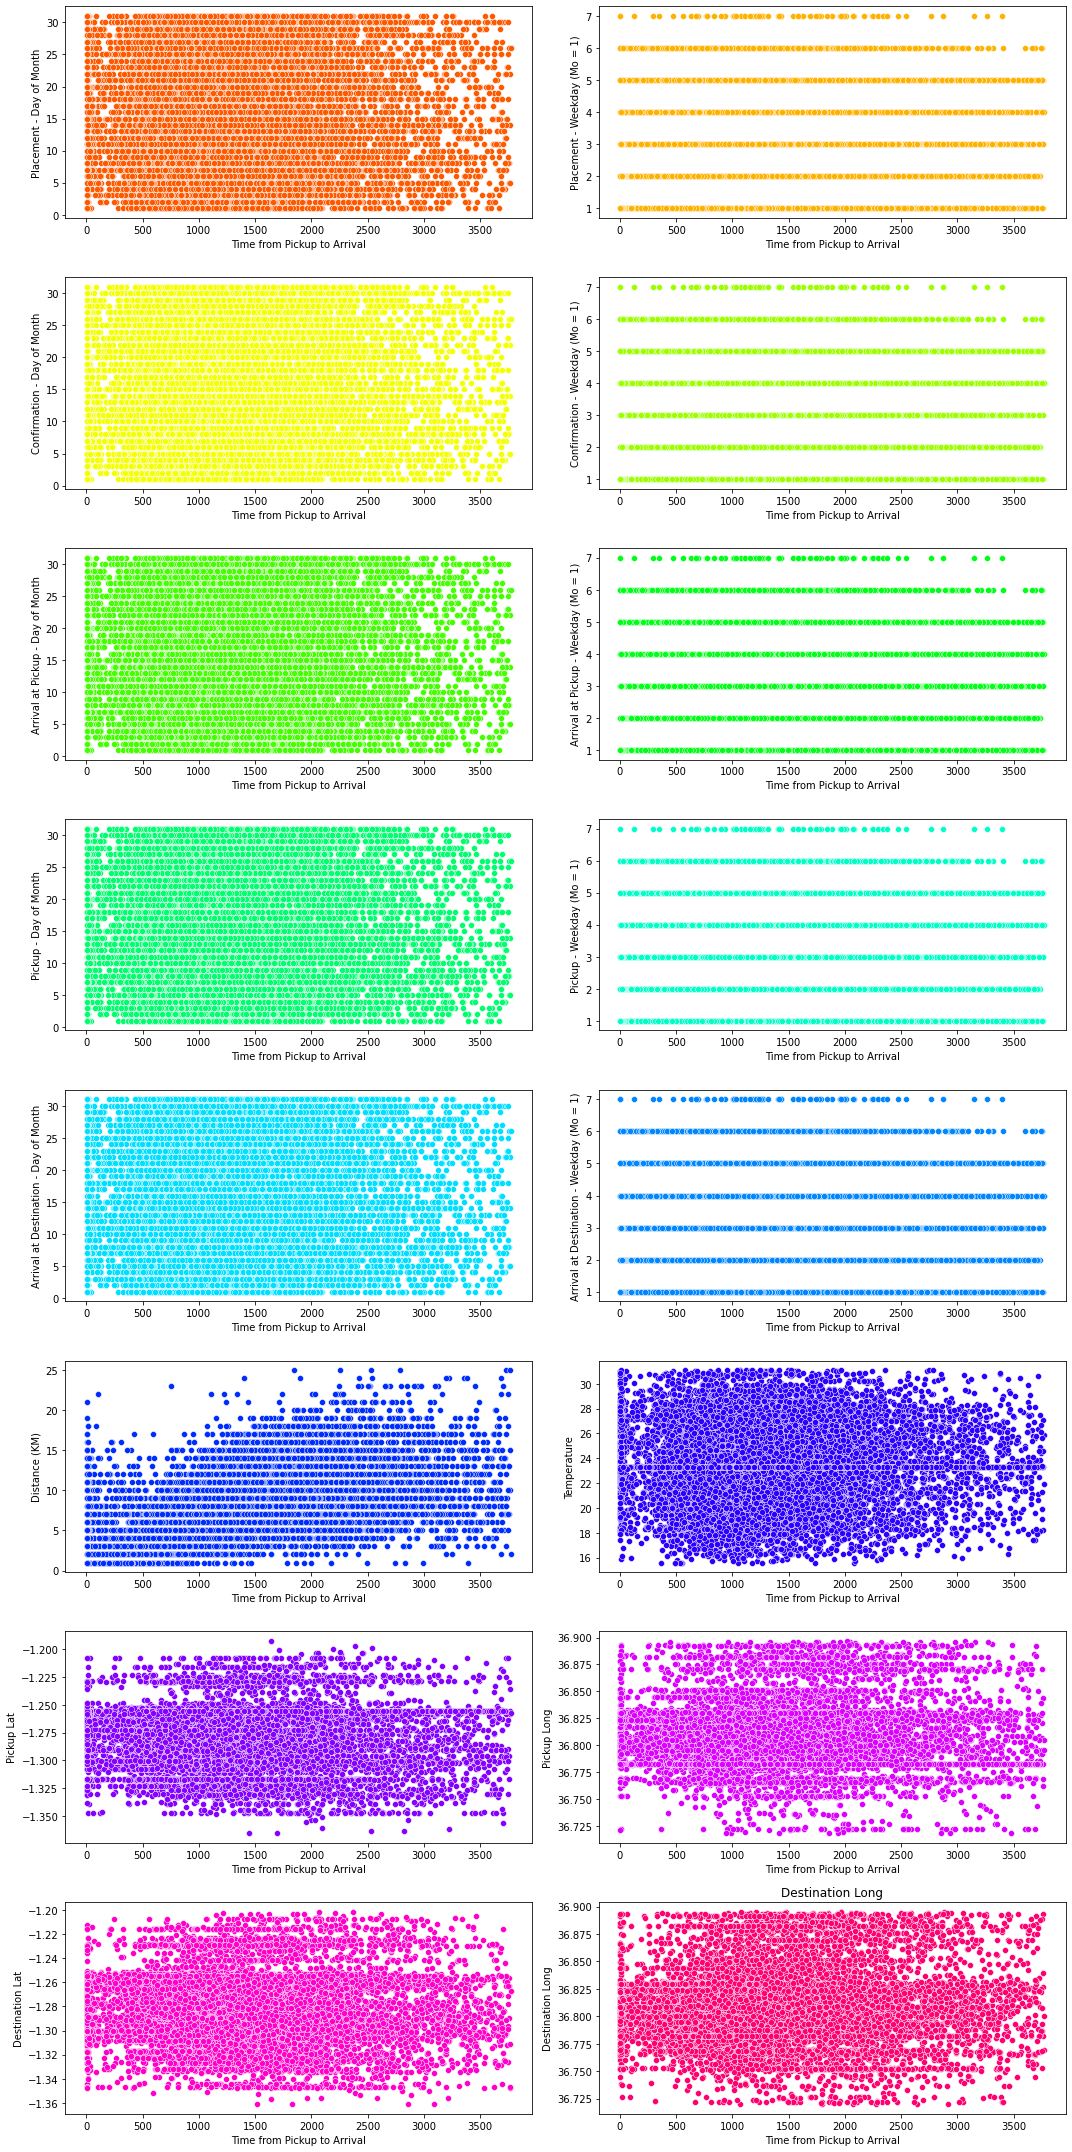

In [138]:
# previewing scatterplots of our numerical variable with our target variable
num_var.remove('Time from Pickup to Arrival')

num_length = round(len(num_var) / 2)
colors = sns.color_palette("hsv", len(num_var))

fig, axes = plt.subplots(nrows = num_length, ncols = 2, figsize = (15, 30))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.scatterplot(x = df['Time from Pickup to Arrival'], y = df[var], ax = ax, color = color)
    plt.title(var)
    
plt.tight_layout()

There does not seem to be a clear relationship between our target variable and the other variables.

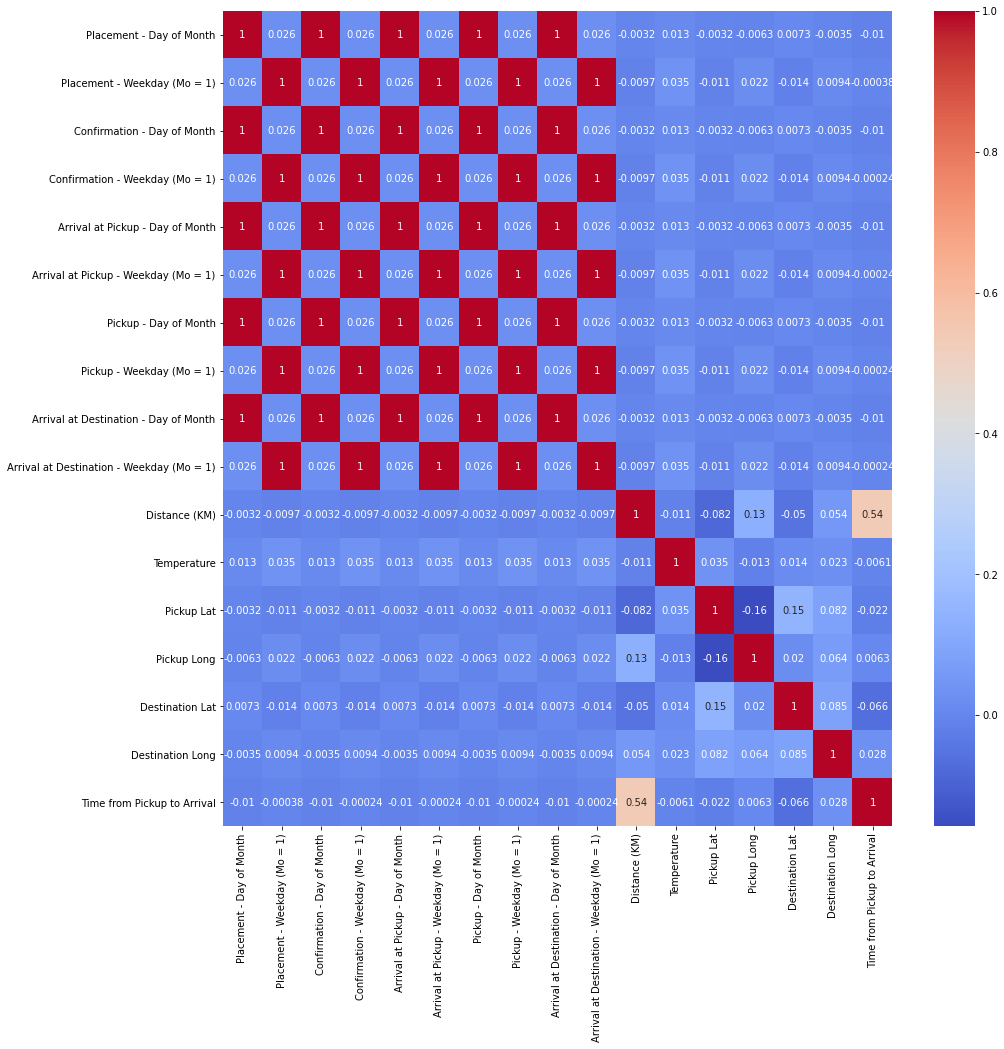

In [139]:
# visualizing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

We see that the days and months are perfectly correlated with one another, and that Distance is moderately correlated with Time from Pickup to Arrival.

## 3.3 Feature Construction

In [140]:
# calculating the rider speed in km/h
df['Rider Speed (km/h)'] = df.apply(lambda x: x['Distance (KM)'] / (x['Time from Pickup to Arrival']/3600), axis=1)

# grouping by Rider Id and calculating the average rider speed
avg_rider_speed_df = pd.DataFrame(df.groupby('Rider Id')['Rider Speed (km/h)'].mean().reset_index().rename(columns={'Rider Speed (km/h)':'Avg Rider Speed (km/h)'}))

# adding the new column to our dataset
df = pd.merge(df, avg_rider_speed_df, on='Rider Id')

# previewing our modified dataset
df.head()

,Order No,User Id,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Speed (km/h),Avg Rider Speed (km/h)
0,Order_No_4211,User_Id_633,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.328859,18.052692
1,Order_No_14170,User_Id_3339,Business,31,5,12:51:41,31,5,13:12:49,31,5,13:20:02,31,5,13:33:08,31,5,14:16:43,6,24.7,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,8.260038,18.052692
2,Order_No_118,User_Id_3688,Business,14,4,14:42:58,14,4,14:44:37,14,4,15:05:00,14,4,15:28:59,14,4,16:13:52,12,27.5,-1.255189,36.782203,-1.261323,36.865718,Rider_Id_432,2693,16.041589,18.052692
3,Order_No_10887,User_Id_2209,Business,16,3,16:28:49,16,3,16:40:48,16,3,17:07:46,16,3,17:10:35,16,3,17:52:02,10,19.9,-1.262691,36.782702,-1.309020,36.840914,Rider_Id_432,2487,14.475271,18.052692
4,Order_No_918,User_Id_1363,Business,28,1,16:03:31,28,1,16:07:45,28,1,16:26:42,28,1,16:35:55,28,1,16:44:42,3,22.4,-1.307787,36.844321,-1.309073,36.831526,Rider_Id_432,527,20.493359,18.052692


In [141]:
# calculating the pickup delay in seconds
from datetime import datetime, date
df['Pickup Delay (seconds)'] = df.apply(lambda x: (datetime.combine(date.today(), x['Pickup - Time']) - datetime.combine(date.today(), x['Confirmation - Time'])).total_seconds(), axis=1)

# grouping by Rider Id and calculating the average pickup delay
pickup_delay_df = pd.DataFrame(df.groupby('Rider Id')['Pickup Delay (seconds)'].mean().reset_index().rename(columns = {'Pickup Delay (seconds)': 'Avg Pickup Delay (seconds)'}))

# adding to our dataset
df = pd.merge(df, pickup_delay_df, on='Rider Id')

# previewing our modified dataset
df.head()

,Order No,User Id,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Speed (km/h),Avg Rider Speed (km/h),Pickup Delay (seconds),Avg Pickup Delay (seconds)
0,Order_No_4211,User_Id_633,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.328859,18.052692,2840.0,1754.133333
1,Order_No_14170,User_Id_3339,Business,31,5,12:51:41,31,5,13:12:49,31,5,13:20:02,31,5,13:33:08,31,5,14:16:43,6,24.7,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,8.260038,18.052692,1219.0,1754.133333
2,Order_No_118,User_Id_3688,Business,14,4,14:42:58,14,4,14:44:37,14,4,15:05:00,14,4,15:28:59,14,4,16:13:52,12,27.5,-1.255189,36.782203,-1.261323,36.865718,Rider_Id_432,2693,16.041589,18.052692,2662.0,1754.133333
3,Order_No_10887,User_Id_2209,Business,16,3,16:28:49,16,3,16:40:48,16,3,17:07:46,16,3,17:10:35,16,3,17:52:02,10,19.9,-1.262691,36.782702,-1.309020,36.840914,Rider_Id_432,2487,14.475271,18.052692,1787.0,1754.133333
4,Order_No_918,User_Id_1363,Business,28,1,16:03:31,28,1,16:07:45,28,1,16:26:42,28,1,16:35:55,28,1,16:44:42,3,22.4,-1.307787,36.844321,-1.309073,36.831526,Rider_Id_432,527,20.493359,18.052692,1690.0,1754.133333


# <font color='#2F4F4F'>4. Data Modeling</font>

In [142]:
# encoding our categorical variables
from sklearn.preprocessing import LabelEncoder

to_encode = ["Personal or Business"]

for x in to_encode:
  le = LabelEncoder().fit(df[x].unique())
  df[x] = le.transform(df[x].values)


In [143]:
# selecting the columns that are categorical variables
cat_var = df.select_dtypes(include = ['object']).columns.to_list()

# split into features (X) and label (Y) while removing categorical variables
cat_var.append('Time from Pickup to Arrival')
X = df.drop(columns = cat_var).values
y = df['Time from Pickup to Arrival'].values

print(X.shape)
print(y.shape)

(14730, 21)
(14730,)


In [144]:
# split into 70-30 train and test sets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 42)

In [145]:
# standardizing our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 4.1 Principal Component Analysis

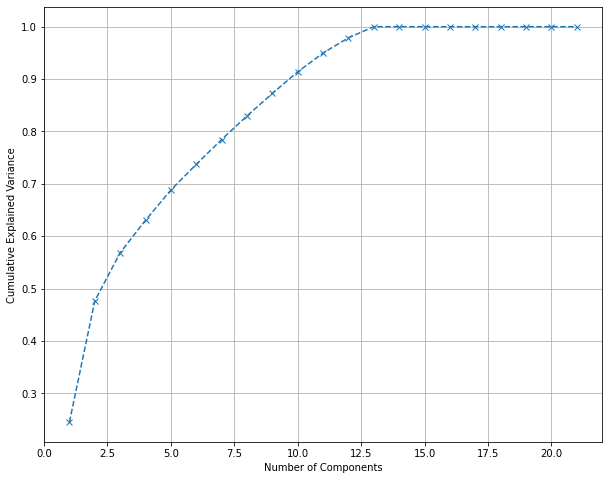

In [146]:
# fitting PCA to our data 
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)
pca.fit(X_train)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

We see that we capture at least 80% of the variance when the number of components is 8.

In [147]:
# fitting PCA with 8 components onto our features and transforming them
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [148]:
X_train.shape

(10311, 8)

In [149]:
# loading some regressors
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

# setting up the regressors
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# fitting our regressors to our training data
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# making predictions
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# evaluating RMSE and R2 scores
from sklearn import metrics 
print('SVM')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('R Squared:', metrics.r2_score(y_test, svm_y_pred))
print()

print('KNN')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('R Squared:', metrics.r2_score(y_test, knn_y_pred))
print()

print('Decision Tree')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
print('R Squared:', metrics.r2_score(y_test, dec_y_pred))
print()

SVM
RMSE: 702.3274868271454
R Squared: 0.19313567080226113

KNN
RMSE: 727.3391235847212
R Squared: 0.1346434552067458

Decision Tree
RMSE: 939.6000555093603
R Squared: -0.44413320003629253



In [150]:
# 10% of the mean of the target variable
0.1*y.mean()

132.7654786150713

What can you note about the relationship between the RMSE values and 10% of the target variable's mean?

The value of RMSE for the three models is greater than 10% the meand value of y. Therefore the models the models are fairly accurate.


## 4.2 Step Forward Feature Selection

### <font color='red'><strong>WARNING:</strong> This method is computationally expensive.</font>

In [152]:
# split into 70-30 train and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 42)

# standardizing our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# using Sequential Feature Selector with forward = True
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# setting up the regressors
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

regressors = [svm_regressor, knn_regressor, dec_regressor]

best_features = {}
a = 0

for i in regressors:
  # setting the selector on all regressors with k_features = 5 and cv = 5
  feature_selector = sfs(i,
           k_features=5,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=5)
  # fitting the selectors to the training data
  feature_selector = feature_selector.fit(X_train, y_train) 

  # getting the features suggested by the selectors
  feat_cols = list(feature_selector.k_feature_idx_)
  best_features[a] = feat_cols
  a += 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  7.4min finished

[2020-10-25 18:43:05] Features: 1/5 -- score: 0.28249096875904944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.7min finished

[2020-10-25 18:50:46] Features: 2/5 -- score: 0.36140282817552816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  9.3min finished

[2020-10-25 19:00:07] Features: 3/5 -- score: 0.3499158605051554[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [153]:
best_features 

{0: [0, 11, 13, 15, 17], 1: [0, 2, 4, 11, 17], 2: [0, 4, 10, 11, 17]}

In [157]:
# split into 70-30 train and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 42)

# standardizing our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [158]:
# without step forward feature selection
# load regressors
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# fitting to training data
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# making predictions
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

In [162]:
# with step forward feature selection
# load regressors
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# setting our features using the provided lists while removing the 'Placement - Time' variable 
# present in the lists

best_features = {0: [0, 11, 13, 15, 17], 1: [0, 2, 4, 11, 17], 2: [0, 4, 10, 11, 17]}

# fitting our regressors to their respective training data
svm_regressor.fit(X_train[:, best_features[0]], y_train)
knn_regressor.fit(X_train[:, best_features[1]], y_train)
dec_regressor.fit(X_train[:, best_features[2]], y_train)

# making predictions
svm_y_pred2 = svm_regressor.predict(X_test[:, best_features[0]])
knn_y_pred2 = knn_regressor.predict(X_test[:, best_features[1]])
dec_y_pred2 = dec_regressor.predict(X_test[:, best_features[2]])

In [170]:
# evaluating RMSE and R2 of both the normal regressors and the sfs regressors
from sklearn import metrics 
SVM = {}
SVM['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))
SVM['RMSE2'] = np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred2))
SVM['R_Squared'] = metrics.r2_score(y_test, svm_y_pred)
SVM['R_Squared2'] = metrics.r2_score(y_test, svm_y_pred2)

KNN = {}
KNN['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))
KNN['RMSE2'] = np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred2))
KNN['R_Squared'] = metrics.r2_score(y_test, knn_y_pred)
KNN['R_Squared2'] = metrics.r2_score(y_test, knn_y_pred2)

Dec_tree = {}
Dec_tree['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred))
Dec_tree['RMSE2'] = np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred2))
Dec_tree['R_Squared'] = metrics.r2_score(y_test, dec_y_pred)
Dec_tree['R_Squared2'] = metrics.r2_score(y_test, dec_y_pred2)

mydict = [SVM, KNN, Dec_tree]
df2 = pd.concat([pd.Series(d) for d in mydict],axis=1).fillna(0).T
df2.index = ['SVM', 'KNN', 'Dec_tree']
df2

,RMSE,RMSE2,R_Squared,R_Squared2
SVM,660.881446,640.118578,0.285556,0.329742
KNN,664.286739,310.973753,0.278174,0.841814
Dec_tree,267.697075,267.738332,0.882778,0.882742


What do you note about teh RMSE and R2 scores?

For the three methods the value of RMSE is above 10% the mean of y, indicating the models are not that accurate.

The Decision Tree Regrossor is the most accurate having an RMSE value close to 10% the mean of the target variable, with its R2 score closer to 1.



## 4.3 Recursive Feature Elimination

In [155]:
from sklearn.feature_selection import RFE

# splitting into 70-30 training and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 42)

# scaling our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform((X_test))

# loading our regressors
svm_regressor = SVR(kernel='linear')
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# setting up RFE with 5 features to select
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 5, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 5, step=1)

# fitting to our training data
svm_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# making predictions
svm_y_pred = svm_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# evaluating RMSE and R2 scores
from sklearn import metrics 
print('SVM')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('R Squared:', metrics.r2_score(y_test, svm_y_pred))
print()

print('Decision Tree')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
print('R Squared:', metrics.r2_score(y_test, dec_y_pred))
print()

SVM
RMSE: 642.2889482741784
R Squared: 0.3251891087384633

Decision Tree
RMSE: 38.86671045075373
R Squared: 0.9975289771881279



# <font color='#2F4F4F'>5. Summary of Findings</font>

The "Decision Tree Regressor" combined with Recursive Feature Selection is the best performing classifier. Where the value of RMSE is below 10% that of the target value and also its R2 Score is closer to 1

# <font color='#2F4F4F'>6. Recommendations</font>

Improve on data collection, and increse amount of data collected to cater for ouliers.

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
Yes

### b) Did we have the right data?
Yes

### c) What can be done to improve the solution?
Improve on data collection and testing different hyper-parameters combination.